In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Hasil Scrap/data_hasil_scrap_positive.csv")
df.tail(2)

,url,text
178,https://www.zenius.net/blog/rangkuman-mata-pel...,home zenius insights mata pelajaran kampus uji...
179,https://primaindisoft.com/kelas-1/,untuk anak contoh materi sekolah kursus online...


In [3]:
# Mencari nilai NaN di kolom 'tweet' menggunakan isna() dan menghitung jumlahnya
nan_count = df['text'].isna().sum()

# Menghitung jumlah data kosong di kolom "text"
jumlah_data_kosong = df['text'].str.strip().eq('').sum()

# Menampilkan jumlah nilai NaN
print("Jumlah nilai NaN di kolom 'text':", nan_count)
print("Jumlah nilai '' di kolom 'text':", jumlah_data_kosong)

Jumlah nilai NaN di kolom 'text': 0
Jumlah nilai '' di kolom 'text': 0


# <h3><b>Fix contractions

In [4]:
with open('Prepo/kbba.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = [line.strip().split('\t') for line in lines]

data_singkatan = pd.DataFrame(data, columns=['Contraction', 'Meaning'])
data_singkatan.tail(2)

,Contraction,Meaning
1380,sayan,sayang
1381,mgkin,mungkin


In [5]:
df_en = pd.read_csv("Prepo/contractions.csv")
df_en.head(2)

,Contraction,Meaning
0,'aight,alright
1,ain't,is not


In [6]:
# Menggabungkan DataFrames secara vertikal (menambahkan baris)
df_singkatan = pd.concat([data_singkatan, df_en], ignore_index=True)

# Ubah DataFrame menjadi kamus
kontraksi_dict = dict(zip(df_singkatan['Contraction'], data_singkatan['Meaning']))

# <h3><b>Remove punctuation

In [7]:
import re

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_tag(text):
    words = text.split()
    filtered_words = [word for word in words if not word.startswith('#')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('http')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('https')]  # Menghapus kata-kata yang dimulai dengan '#'
    return ' '.join(filtered_words)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    hasil = re.sub(r'[^\w\s]', '', text)
    return hasil

# Fungsi untuk mengatasi kontraksi dalam bahasa Indonesia
def expand_contractions_id(text):
    kontraksi_dict
    
    words = text.split()
    expanded_text = [kontraksi_dict[word] if word in kontraksi_dict else word for word in words]
    return ' '.join(expanded_text)

def ubah_angka(text):
    # Menggunakan regular expression untuk mengganti karakter alay
    teks_benar = re.sub(r'3', 'e', text)
    teks_benar = re.sub(r'4', 'a', teks_benar)
    teks_benar = re.sub(r'1', 'i', teks_benar)
    teks_benar = re.sub(r'0', 'o', teks_benar)

    # Menggunakan regular expression untuk memisahkan angka yang terikat dengan kata "mekinya"
    # angka = re.search(r'(\d+)$', teks_benar).group(1)
    # teks_benar = re.sub(r'\d+$', '', teks_benar)

    # # Menggabungkan kembali teks dengan angka
    # hasil_akhir = teks_benar + angka
    return teks_benar

def remove_number(text) :
    hasil = re.sub(r'\d', '', text)
    return hasil

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    # Menggunakan ekspresi reguler untuk mencari dan menghapus tautan
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_single_letter_words(text):
    text = re.sub(r'\b\w\b', '', text)
    
    hapus = ['rj','lc','en','ar','mc','vt','rob','ny','dc','az','va']
    words = text.split()

    # Memfilter kata-kata yang tidak ada dalam array yang akan dihapus
    kata_kata_tanpa_kata_yang_dihapus = [kata for kata in words if kata not in hapus]

    # Menggabungkan kata-kata yang tersisa menjadi kalimat baru
    kalimat_tanpa_kata_yang_dihapus = ' '.join(kata_kata_tanpa_kata_yang_dihapus)
    return kalimat_tanpa_kata_yang_dihapus

# Preprocessing kolom 'text'
df['text'] = df['text'].apply(remove_tag)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(expand_contractions_id)
df['text'] = df['text'].apply(ubah_angka)
df['text'] = df['text'].apply(remove_number)
df['text'] = df['text'].apply(remove_links)
df['text'] = df['text'].apply(remove_single_letter_words)

# Menampilkan DataFrame setelah preprocessing
df.head(2)

,url,text
0,https://wikipedia.org,wikipedia the free encyclopedia english ooo ar...
1,https://thefreedictionary.com,dictionary encyclopedia and thesaurus the free...


In [8]:
# df['text'].to_list()[-1]

# <h3><b>Translate Language

In [9]:
# from langdetect import detect

# teks = "login daftar slot gacor promo kontak masuk menu bonus top game online di indonesia #1 | wild west gold mengambil inspirasi dari style zaman para cowboy berjaya, pragmatic play pada 23 maret 2020 merilis ... 22:50 s.d. 01:45 wib #2 starlight princess dengan maskot karakter peri september 2021 yang diberi nama princes. 20:30 00:35 #3 gates of olympus buatan adalah judi persentase rtp senilai 96.5%. pemain 13:15 16:15 #4 aztec bonanza siapa bilang hanya sebuah membosankan? gameplay begitu-gitu saja? faktanya ada 05:15 09:15 #5 sweet menjadi salah satu produk paling populer oleh play. dirilis 10:50 14:45 situs aquaslot garansi kekalahan 100 quaslot, terpercaya siap diakses 24 jam nonstop. sekian banyak mungkin bertebaran luar sana, tapi cuma berani kasih modal kembali! nikmati taruhan menguntungkan jackpot terbesar. menyuguhkan kumpulan gampang maxwin atas 95%. gems, bonanza, olympus, fire strike, 5 lions megaways provider resmi play, habanero, playson, yggdrasil, i soft bet, idnslot minimal deposit rp 20.000 metode transfer bank, dana, ovo, gopay, link aja, sakuku baru kembali 100%, petir terbaru the power thor permainan punya 7 gulungan. 96.55 esutan bernama merupakan 6 reels mengantarkan 96.52 ye cleopatra bertemakan keemasan mesir kuno, 16 april 2022. ini 96.50% pyramid selalu memberikan kejutan diciptakan. kali lewat 96.4 ems deluxe rilis juli 2020. terkemuka pengembang ini. hari nomor 1 indonesia, casino terbaik bagi anda. aneka macam terkumpul disini sampai ribuan judul! mesin terbesar menang dan kumpulkan sebanyak-banyaknya keuntungan. semua orang kesempatan sama untuk peluang emas tersebut. apalagi jika anda sudah akun selain profit juga akan mendapatkan untung extra berbagai spesial luangkan waktu menit saja, lakukan pendaftaran gacor, akses menuju kenikmatan tersebut pun langsung miliki. melayani transaksi lengkap. kami menerima pulsa, rekening e-wallet. 10 ribu saja dapat putaran hingga ratusan lipat harga taruhan. ayo miliki aquaslot. putar gulungan favoritmu! sejarah sejak ditemukannya internet atau virtual jenis sangat seluruh dunia. memungkinkan memutar mencoba keberuntungan mereka dalam memenangkan hadiah uang tunai. dimulai tahun 1990-an ketika mulai berkembang diikuti kemunculan kasino online. pertama muncul 1994. perusahaan kecil microgaming perangkat lunak utama menyediakan permainan, termasuk slot. namun, awalnya tidak terlalu karena masih lebih memilih fisik dunia nyata. 1996, mengembangkan sepenuhnya berbasis disebut "cash splash". memiliki lima 15 payline, menawarkan progresif. berarti bahwa setiap seseorang memainkan tersebut, sebagian ditambahkan ke jackpot, sehingga jumlah hadiahnya terus bertambah. setelah itu, industri perjudian tumbuh pesat semakin canggih menarik fitur-fitur seperti grafik 3d, animasi, efek suara realistis. rekomendasi 2023 member bisa menemukan berasal negara. temukan kesayangan anda, pilih sesuai bocoran telah temukan, selamat bermain. berikut aquaslot: 1. idn gaming b2b ternama asia. begitu dikenal berkat platform poker, namun tetap bersedia menjawab permintaan pasar menghadirkan terkhusus bersama aquslot puluhan judul mengangkat kultur khas nusantara. pengembalian 97%. 2. total tersedia sebanyak 350 judul. tiap rata-rata membawa fitur multiplier. baik multiplier berjenis simbol pengali, wild, maupun increasing berdasarkan hitungan kemenangan beruntun. sendiri diminati pemain. antara terpopulernya gatot kaca. 3. habanero tertinggi beredar, satunya dimiliki habanero. koi gate, berkemampuan return 98%. tak fokus persoalan rtp, merancang kemampuan memudahkan menang. contohnya beberapa cukup sering kita jumpai pengaplikasian expanding 2, 3, 4. dampak positifnya panel mudah pecah semua. big time (btg) australia disegani program sukses besar pasaran ya, seri dasarnya mengadaptasi milik btg. mekanisme kelebihan berupa paylines melimpah. maka heran bila label btg disebut-sebut sebagai pernah dibuat. 5. nolimit city didirikan 2014, diberdayakan orang-orang profesional penuh pengalaman pantas mampu inovasi extreme volatility. memberi positif terhadap potensi maxwin. menggunakan volatility berhenti menaikan pembayaran nilainya kelipatan 20 bet. penasaran? mainkan sekarang! 6. playstar (ps) mata terpercaya. memang benar kalau 2015, tetapi saat itu lah alternatif penikmat hampir 150 playstar. produknya, langkah praktis tema tradisional diberikan sentuhan modern. 7. net ent berjudul gonzo quest direkomendasikan forum online, sebenarnya berkenalan suplier ent. terhitung berdiri igaming sedari 1996. demi berlalu benar-benar dimanfaatkan meningkatkan kehandalan terbaik. berhasil inovatif 8. era momen meluncurkan web 1994, dibuat muka bumi. adapun cash splash 1998. sekarang, semuanya kepada 9. pg pocket standar tersendiri. grafis visual 3d. dilihat permainannya, nampak menentukan buat harus membayar 10000x tentu bawah dipastikan bakal menunjukan level volatilitas tinggi. 10. trend (ttg) mengajak memasuki kaya hiburan kemenangan. ttg secara sempurna mencampur baurkan rng, slot, unsur visual-audio game. tepat bahkan meskipun mood sedang kurang bagus mengembalikan semangat mengikuti brand datang market populer, aplikasi poker fenomenal. bukan sebatas saja. eksklusif menjalin kerja sama. mendapat suport yaitu: odin free spin taruhan, apabila 4 scatter tertangkap layar setidaknya gratis. pengali x2 x500. cepat dirancang legenda tengah masyarakat lain babi ngepet. mengandalkan perkalian kemenganan runtuhan angka (+1). lainnya, 20x naga berkelipatan sederhana (5 x 3 baris). jangan menilai. menyimpan segudang bonus. antaranya spin, symbol. grand sebesar 50 bet pasang. menaklukan hati belakangan. keberadaan mudahnya alasan kenapa dicintai. sementar menyentuh beserta disukai inilah (pragmatic play) keluaran sejenis segala posisi asalkan jumlahnya 8 lebih. pemicu spin. buah babak terbuka. berada 95,51%. didukung x500, bervolatilitas tinggi 5000x mengejutkan. 2022, keluar regular. maksimal x100. sekitaran 21.000x dijanjikan 95,45%. high cocok pemburu kaca boleh versi mitologi bharatayuddha aset visualnya, sisi manapun tanggal desember 2022 spek identik kakek zeus. gatotkaca diakumulasikan berakhir. mahjong ways 2 (pg soft) walaupun sejumlah mengeluhkan konsep agak membingungkan, membatalkan fakta fenomenal soft. 100 nominal yakni dreams macau mengaplikasikan sistem tambahan. jadi, vertikal horizontal. menampilkan membagi baris pasti. masing-masing reel barisnya masing-masing. membuat aturan 2025 32400 garis berbeda. treasures didesain gaya menyenangkan, menjanjikan 96,71%. medium treasure tipe keuntungan bertahap. titik tertentu menikmati selanjutnya. bayaran cara main pemula memperoleh pastinya tujuan sebab bagaimanapun, sumber penghasilan dijalani. sulit bermain hal aneh tertarik sebelum mengharapkan kemenangan, “hijau” sebaiknya pelajari dulu memasang penting soal bagaimana mengatur biasanya saldo nilai tampil satuan rupiah unit. perhatikan ditampilkan apa. menekan tombol plus (+) minus (-) menurunkan kehendak melakukan terbagi cara, yaitu manual, otomatis. manual; tekan mengacak putaran. sedangkan ingin otomatis, silahkan bertuliskan auto. lalu berapa otomatis inginkan. memilihnya auto tadi pilih. fasilitas berjalan, menghentikannya kapan mencapai batas ditentukan. perlu ketahui juga, terdapat opsi turbo mempercepat jalannya peroleh memenuhi paylines. berbeda-beda. menetapkan jumlah, pola keluaran, urutan mengenai bingung. maxwin, lihat paylinesnya info. poin sadari belum kenapa? alasannya murah bernilai persen kabar baiknya mengalikan maka, pahami membayar. informasi lengkap dimuat info mainkan. trik anti rungkat, strategi jitu tips membantu jackpot: teratur menguasai disediakan. memanfaatkan didalam fast double chance (dc) buy gunakan harinya: 40x quick spasi 15x contreng freespin pastikan memadai memadai. mengisi ditetapkan agen tidaklah cukup. mempertimbangkan habiskan berkali-kali, lipatnya minimal. lama besar. pilihan penyedia terbaik, admin direkomendasikan, stabil konsisten. withdraw sedikit dapatkan terakhir mesti diperhatikan segera wd withdraw. mengecilkan kemungkinan merubah dapatkan. gabung waktunya menyenangkan menguntungkan. hadir lainnya. mari simak layanan serta beroperasi selama tahun, kami. memperbaiki memastikan handal. tanpa blokir lagi merasa kesal diblokir internet. hambatan kendala. dijamin aman sangatlah terpercaya, teknologi dilakukan terjamin keamanannya. transaksi. sepanjang lewatkan penawaran kunjungi halaman mengetahui sediakan. itulah ragu bergabung rasakan tawarkan! mengakses juga. cepat. berusia 18 bank e-wallet syaratnya. via bca, mandiri, bri, danamon, bni, bsi, ovo. mendaftar ikuti panduannya ini: klik isi formulir pendaftaran, terdiri dari: pribadi periksa teliti apakah data input valid. selesai formulir, formulir. lanjutkan melalui lokal nama-nama gunakan: bca bni bri bsi mandiri danamon ovo gopay dana aja - tab deposit. gunakan. cek transfer. (wajib dicek transfrer) transfer, depo rp. ribu. konfirmasi. lengkapi submit isi. lambat menit, dompet akun. bantuan panduan menghubungi customer service bosku. faq pertanyaan umum baca agar paham resmi? mengantongi lisensi regulator internasional. aman? keamanan terjamin. pragmatic? (14:00 17:00) (20:00 23:00) (08:00 11:00) (23:00 02:00) (06:00 09:00) apa aquaslot? red tiger star bgaming gmw spinomenal upg terjangkau biaya memungut apapun member. saya kerahasiaannya? menjaga privasi bocor kemana pun. © 2022-2023 all rights reserved."

# # Deteksi bahasa
# bahasa = detect(teks)

# # Cetak bahasa yang terdeteksi
# print(f"Bahasa yang terdeteksi: {bahasa}")
# # teks[:500]

In [10]:
from deep_translator import GoogleTranslator

# Batasi setiap nilai dalam kolom "text" menjadi maksimal 500 karakter
df['text'] = df['text'].str.slice(0, 500)

In [11]:
def translate(text):
    # to_translate = 'I want to translate this text'
    translated = GoogleTranslator(source='auto', target='en').translate(text)
    return translated

# Preprocessing kolom 'text'
df['text'] = df['text'].apply(translate)

# <h3><b>Stopword

In [20]:
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover

# Download stopwords (jika belum diunduh)
nltk.download('stopwords')
# Ambil daftar stopwords dalam bahasa Inggris
stop_words = set(stopwords.words('english'))

# Inisialisasi stopword remover dari Sastrawi
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

stop_words = list(stop_words)
tambahan = ['welcome','paling','skip','content','menu','belum','ai','month','year','day','lanjut','access','ads','ok','must','ee','ao','login','oa','data','connection','ia','cookies','us','log','kami','dlvr','id','co','p','ly','youtu','bal','nder','nak','http','rm','whq','com','st','pth','html','bz','ss','cc','tt','oi','ie','io','ii','oe','ik','cookie','eo','ak','ek','ioo','vr','ea','oo','ei','usc']
stop_words.extend(tambahan)

# Menghapus stopwords dari kolom 'text'
# df['text'] = df['text'].apply(lambda x: stopword_remover.remove(x))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Menampilkan DataFrame setelah menghapus stopwords
df.head(2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,text,status
0,https://wikipedia.org,wikipedia free encyclopedia english ooo articl...,aman
1,https://thefreedictionary.com,dictionary encyclopedia thesaurus free diction...,aman


In [13]:
df['text'].to_list()[0]

'wikipedia free encyclopedia english ooo articles free english spanish articles deutsch article francais italiano voci free encyclopedia portuguese artigos arabic article ة search afrikaans polski asturianu azərbaycanca bol белгарски bol беларуская català čeština cymraeg dansk eesti esperanto euskara farsi galego 한국어 hand hrvatski ba speaks indonesia Latin Latvian Lietuvių Magyar Egyptian Melayu Bahaso Minangkabau Nederlands Norwegian Bokmål Nynorsk нохчийн Oʻzbekcha ўзбекч'

# <h3><b>Stemming

<h5>Indo

In [14]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# # Inisialisasi objek stemmer
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# # Fungsi untuk melakukan stemming pada teks
# def stem_text(text):
#     words = text.split()  # Membagi teks menjadi kata-kata
#     stemmed_words = [stemmer.stem(word) for word in words]  # Melakukan stemming pada setiap kata
#     return ' '.join(stemmed_words)  # Menggabungkan kembali kata-kata menjadi teks

# # Menggunakan fungsi stemming pada kolom 'text'
# df['text'] = df['text'].apply(stem_text)

<h5>EN

In [15]:
# from nltk.stem import PorterStemmer

# nltk.download('punkt')
# # Membuat objek stemmer
# stemmer = PorterStemmer()

# # Melakukan stemming pada kolom 'text'
# df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

<h3><b> lemmatisasi 

In [16]:
# import spacy

# # Memuat model bahasa Inggris
# nlp = spacy.load("en_core_web_sm")
# # doc = nlp(text)

# # # Fungsi untuk menerapkan lemmatisasi pada teks
# # def lemmatize_text(text):
# #     doc = nlp(text)
# #     lemmas = [token.lemma_ for token in doc]
# #     return " ".join(lemmas)

# # # Menerapkan lemmatisasi pada kolom "text"
# # df['text'] = df['text'].apply(lemmatize_text)
# df['text'] = df['text'].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))

In [17]:
df['text'].to_list()[0]

'wikipedia free encyclopedia english ooo articles free english spanish articles deutsch article francais italiano voci free encyclopedia portuguese artigos arabic article ة search afrikaans polski asturianu azərbaycanca bol белгарски bol беларуская català čeština cymraeg dansk eesti esperanto euskara farsi galego 한국어 hand hrvatski ba speaks indonesia Latin Latvian Lietuvių Magyar Egyptian Melayu Bahaso Minangkabau Nederlands Norwegian Bokmål Nynorsk нохчийн Oʻzbekcha ўзбекч'

In [22]:
df['status'] = 'aman'
df.to_csv("data_bersih_positive.csv", index=False)

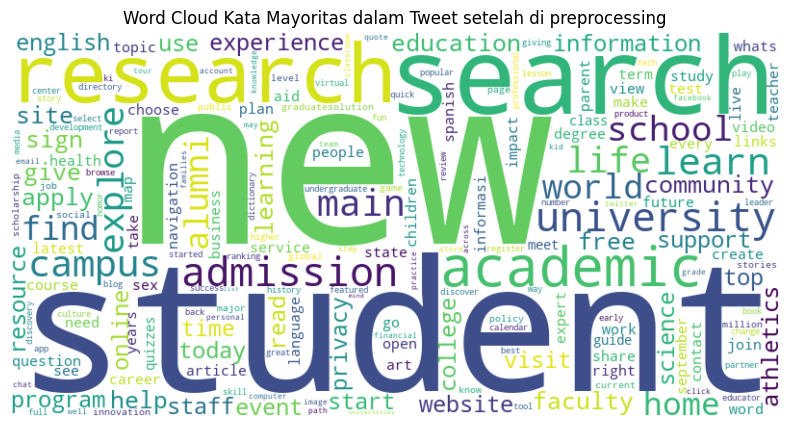

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tes = df['text'].to_list()
# Menggabungkan semua kata dalam kolom tweet
all_words = ' '.join(tes)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Mayoritas dalam Tweet setelah di preprocessing')
plt.show()